In [210]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Colour Scheme
plt.style.use('seaborn-darkgrid')
# dark style colours
plt.rcParams["image.cmap"] = "Dark2"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)
plt.rcParams["figure.figsize"] = (8,8)
# title font
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
# axis font
plt.rcParams['axes.labelsize'] = 14
# legend font size
plt.rcParams['legend.fontsize'] = 18

In [211]:
# Load Data
sph_exa = ['sphexa','sphexa_cuda']
sedov_versions = ['sedov_wone',
            'sedov_cstone',
            'sedov_west',
            'sedov_wisb',
            'sedov_wser',
            'sphexa_cuda_nogpu',
            ]

outputdir = "./out/"



In [212]:
# Matplotlib 
plt.rcParams['legend.fontsize'] = 'large'

In [213]:
allresults = []
# Read file line by line
for sedov_version in sedov_versions + sph_exa:
    print(sedov_version)
    dir = outputdir + sedov_version + "/"
    configs = glob.glob(dir + "*.txt")
    # From all the configs with data on them in the directory, read in their times
    for config in configs:
        with open(config) as f:
            lines = f.readlines()
            lines = [line.strip() for line in lines]
            times = []
            for line in lines:
                # Check file exists
                try:
                    with open(outputdir + "slurms/" + line) as f2:
                        lines2 = f2.readlines()
                        lines2 = [line2.strip() for line2 in lines2]
                        if len(lines2) > 0:
                            times.append(lines2[0])
                except FileNotFoundError:
                    print("File not found: " + line)
                except IsADirectoryError:
                    print("Is a directory: " + line)

            config_split = config.split("-")
            n_particles         = int(config_split[0].split("/")[-1])
            totalparticles      = n_particles * n_particles * n_particles
            timestep            = float(config_split[1])
            threads             = int(config_split[2])
            # if config split 3 is an int
            nodes = 1
            if config_split[3].isdigit():
                nodes = int(config_split[3])
            times               = [float(time) for time in times]
            avgtime             = np.mean(times)
            
            # Remove first and last time outliers
            trueavg = np.mean(times[1:-1]) if len(times) > 2 else avgtime
            stdev = np.std([float(time) for time in times])

            truestdev = np.std(times[1:-1]) if len(times) > 2 else stdev
            trials = len(times)
            if (".txt" in config_split[3]):
                output = config_split[3] != 'no' # Whether output was enabled
            elif (len(config_split) == 6):
                output = config_split[3] != 'no'
            else:
                output = config_split[4] != 'no' # Whether output was enabled

            if sedov_version == 'sphexa':
                print(config_split)
            allresults.append([sedov_version,output,n_particles,totalparticles,timestep,threads,nodes,avgtime,trueavg,stdev,truestdev,trials])
        

print(allresults)

sedov_wone
File not found: slurm-924247.out
File not found: slurm-924265.out
File not found: slurm-924284.out
File not found: slurm-924259.out
File not found: slurm-924278.out
File not found: slurm-924296.out
File not found: slurm-924253.out
File not found: slurm-924272.out
File not found: slurm-924290.out
sedov_cstone
sedov_west
sedov_wisb
File not found: slurm-879042.out
File not found: slurm-872832.out
sedov_wser
sphexa_cuda_nogpu
File not found: slurm-924057.out
File not found: slurm-924055.out
File not found: slurm-924058.out
File not found: slurm-924059.out
File not found: slurm-924053.out
File not found: slurm-924054.out
sphexa
['./out/sphexa/30', '100', '2', 'jobs.txt']
['./out/sphexa/50', '100', '32', '1', 'no', 'out', 'jobs.txt']
['./out/sphexa/50', '100', '1', '1', 'no', 'out', 'jobs.txt']
['./out/sphexa/30', '100', '8', 'jobs.txt']
['./out/sphexa/30', '100', '16', 'no', 'out', 'jobs.txt']
['./out/sphexa/30', '100', '32', 'jobs.txt']
['./out/sphexa/100', '100', '32', '1', 'n

/dcs/20/u2054054/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/dcs/20/u2054054/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dcs/20/u2054054/.local/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/dcs/20/u2054054/.local/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/dcs/20/u2054054/.local/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


['./out/sphexa/30', '100', '1', 'no', 'out', 'jobs.txt']
File not found: slurm-900048.out
File not found: slurm-900059.out
['./out/sphexa/63', '100', '32', 'jobs.txt']
['./out/sphexa/30', '100', '4', 'jobs.txt']
['./out/sphexa/100', '100', '1', '1', 'no', 'out', 'jobs.txt']
['./out/sphexa/30', '100', '40', 'no', 'out', 'jobs.txt']
['./out/sphexa/100', '100', '2', '1', 'no', 'out', 'jobs.txt']
sphexa_cuda
[['sedov_wone', True, 30, 27000, 100.0, 2, 1, 29.18, 29.18, 0.0, 0.0, 1], ['sedov_wone', False, 50, 125000, 100.0, 32, 1, 10.56, 10.56, 0.0, 0.0, 1], ['sedov_wone', True, 30, 27000, 100.0, 16, 1, 15.52, 15.52, 0.0, 0.0, 1], ['sedov_wone', False, 50, 125000, 100.0, 1, 1, 122.51, 122.51, 0.0, 0.0, 1], ['sedov_wone', False, 30, 27000, 100.0, 4, 1, 10.078, 10.443333333333333, 1.1798711794090064, 1.4047854719572745, 5], ['sedov_wone', False, 100, 1000000, 100.0, 32, 1, 70.06666666666666, 69.58, 0.7167209281783853, 0.0, 3], ['sedov_wone', False, 100, 1000000, 100.0, 4, 1, 254.96333333333334,

In [214]:
allresults = pd.DataFrame(allresults)
allresults.columns = ['Version','Output','n_particles','Total Particles','Timestep','Threads','Nodes','AvgTime','TrueAvgTime','Stdev','TrueStdev','Trials']
# print(allresults)
allresults['TotalThreads'] = allresults['Threads'] * allresults['Nodes']
# print(allresults[allresults['Version'] == 'sedov_cstone'].sort_values(by=['Threads','Output']))

152    1
154    1
117    1
132    1
126    1
115    1
125    1
139    2
136    4
Name: Nodes, dtype: int64
26    1
31    1
6     1
16    1
12    1
5     1
11    1
23    2
21    4
Name: Nodes, dtype: int64


/dcs/20/u2054054/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/dcs/20/u2054054/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


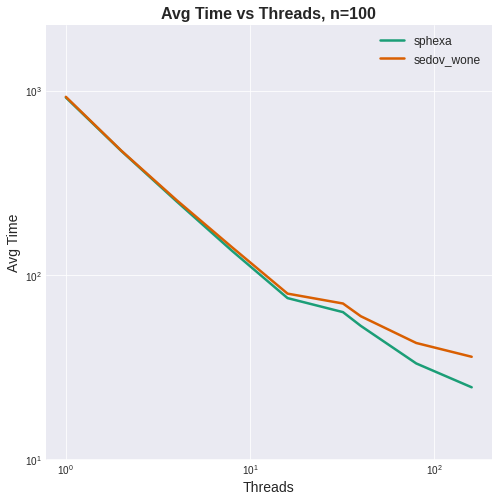

In [215]:
def runtimes_plot(df, versions,sizes=[20],time=100,output=None,title=None,multinode=False,basethreads=40):
    # subplot for each size
    for size in sizes:
        for version in versions:
            data = df[df['Version'] == version]
            data = data[data['n_particles'] == size]
            data = data[data['Timestep'] == time]
            data = data.sort_values(by='Threads')
            data = data[data['AvgTime'].notnull()]
            if multinode == False:
                data = data[data['Nodes'] == 1]
            else:
                data = data.sort_values(by='TotalThreads')

            if (version == 'sedov_wisb' or version == 'sedov_west') and not data['AvgTime'].isnull().all():
                y = data['AvgTime'].mean()
                threadnums = [1,2,4,8,16,32,40]
                plt.plot(threadnums,[y]*len(threadnums), label=version,lineWidth=2.5)
            elif version != 'sedov_wisb':
                print(data['Nodes'])
                plt.plot(data['Threads']*data['Nodes'], data['AvgTime'], label=version,lineWidth=2.5)
        # larger size
        plt.xlabel('Threads')
        plt.ylabel('Avg Time')
        plt.yscale('log')
        plt.xscale('log')
        plt.grid(True)
        # equal axes
        plt.axis('equal')
        plt.legend()
        if title is not None:
            plt.title(title)
        else:
            plt.title('Avg Time vs Threads, n=' + str(size))
        # Make bigger legend
        
        plt.show()
# runtimes_plot(allresults[allresults['Output'] == False], ['sedov_west','sedov_wser','sedov_wisb','sedov_cstone','sphexa','sedov_wone','sphexa_cuda'],sizes=[20,30],time=100)

runtimes_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[100],time=100,multinode=True,basethreads=40)


No base time data for sphexa 20 100
No base time data for sedov_wone 20 100


/dcs/20/u2054054/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


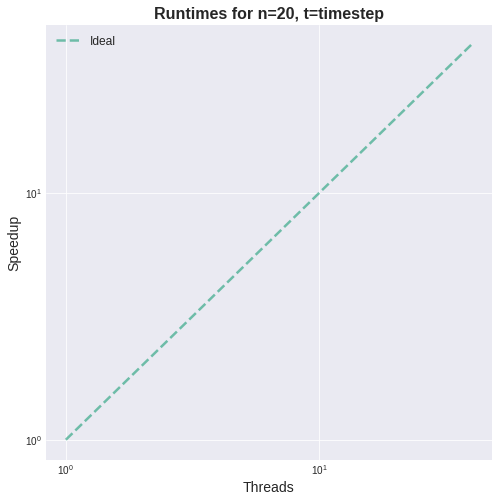

/dcs/20/u2054054/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/dcs/20/u2054054/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/dcs/20/u2054054/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


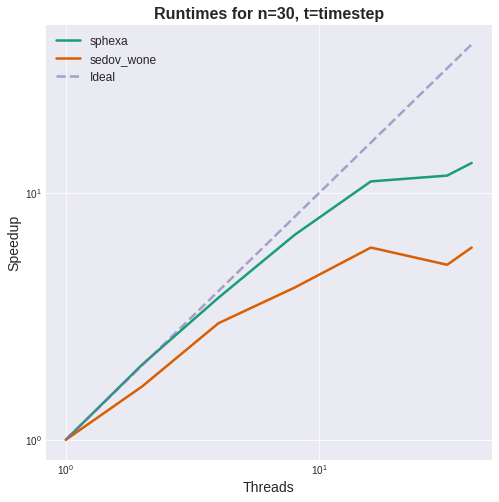

/dcs/20/u2054054/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/dcs/20/u2054054/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/dcs/20/u2054054/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


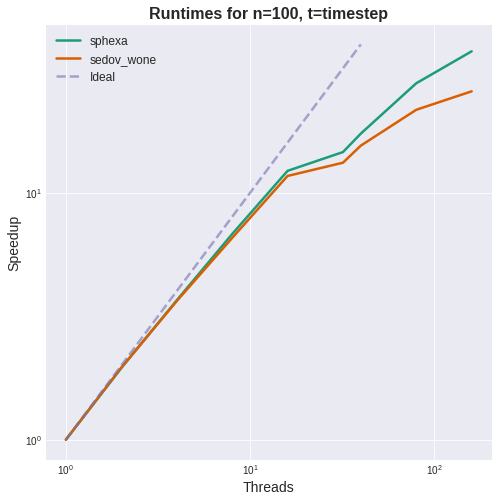

In [216]:
def strong_scaling_plot(df, versions,sizes=[20],time=100,output=None):
    # subplot for each size
    for size in sizes:
        for version in versions:
            data = df[df['Version'] == version]
            data = data[data['n_particles'] == size]
            data = data[data['Timestep'] == time]
            data = data.sort_values(by='TotalThreads')
            data = data[data['AvgTime'].notnull()]
            if data[data['Threads'] == 1]['AvgTime'].isnull().all():
                print(f"No base time data for {version} {size} {time}")
                continue
            basetime = data[data['Threads'] == 1]['AvgTime'].values[0]
            if (version == 'sedov_wisb' or version == 'sedov_west') and not data['AvgTime'].isnull().all():
                y = 1.0
                threadnums = [1,2,4,8,16,32,40]
                plt.plot(threadnums,[y]*len(threadnums), label=version,lineWidth=2.5)
            elif version != 'sedov_wisb':
                plt.plot(data['TotalThreads'], 1/(data['AvgTime']/basetime), label=version,lineWidth=2.5)
        # larger size
        # plot y=x
        plt.plot([1,40],[1,40],label='Ideal',lineWidth=2.5,linestyle='--',alpha=0.6)
        plt.xlabel('Threads')
        plt.ylabel('Speedup')
        plt.yscale('log')
        plt.xscale('log')
        plt.grid(True)
        # equal axes
        # plt.axis('equal')
        plt.legend()
        plt.title(f'Runtimes for n={size}, t=timestep')
        
        plt.show()
strong_scaling_plot(allresults[allresults['Output'] == False], ['sphexa','sedov_wone'],sizes=[20,30,100],time=100)

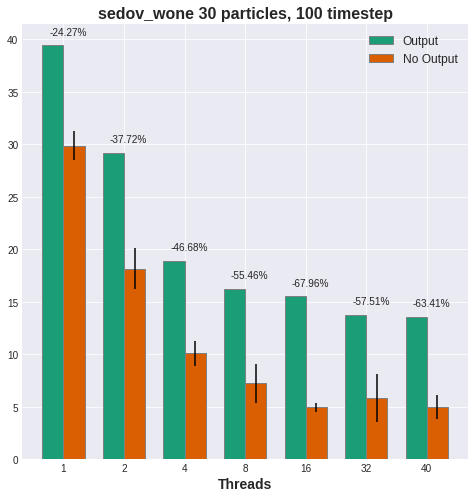

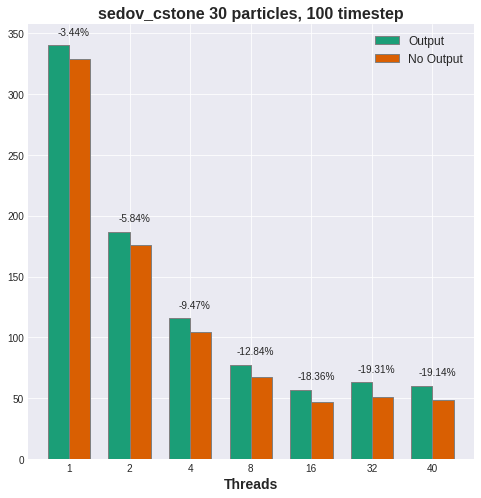

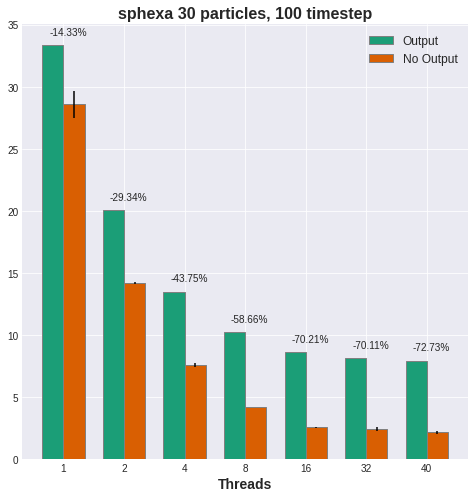

In [217]:
# Bar graphs for each version output vs no output

def output_bar_graph(df, versions, sizes=[20], time=100):
    for size in sizes:
        for version in versions:
            output_times = []
            no_output_times = []
            output_stdevs = []
            no_output_stdevs = []
            thread_values = [1, 2, 4, 8, 16, 32, 40]
            for threads in thread_values:
                data = df[(df['Version'] == version)  & 
                          (df['n_particles'] == size) & 
                          (df['Timestep'] == time)    & 
                          (df['Threads'] == threads)  &
                          (df['Nodes'] == 1)]
                output = data[data['Output'] == True]
                no_output = data[data['Output'] == False]
                # if not output['AvgTime'].isnull().all() and not no_output['AvgTime'].isnull().all():
                output_times.append(output['AvgTime'].mean())
                no_output_times.append(no_output['AvgTime'].mean())
                output_stdevs.append(output['Stdev'].mean())
                no_output_stdevs.append(no_output['Stdev'].mean())

            bar_width = 0.35
            r1 = np.arange(len(thread_values))
            r2 = [x + bar_width for x in r1]
            

            if (len(r1) != len(output_times)):
                print(version)
                print(r1)
                print(output_times)
                print("ERROR")
            if (len(r2) != len(no_output_times)):
                print(r2)
                print(no_output_times)
                print("ERROR")
            plt.bar(r1, output_times, width=bar_width, edgecolor='grey', label='Output',yerr=output_stdevs)
            plt.bar(r2, no_output_times, width=bar_width, edgecolor='grey', label='No Output',yerr=no_output_stdevs)

            # Calculate percentage difference and display it above the bars
            a = max(output_times + no_output_times)
            for i in range(len(output_times)):
                perc_diff = (no_output_times[i] - output_times[i]) / output_times[i] * 100
                
                plt.text(r1[i]+0.25, output_times[i] + (a/40.0), f'{perc_diff:.2f}%', ha='center')
                # plt.text(r2[i], no_output_times[i] + 0.05, f'{perc_diff:.2f}%', ha='center')

            plt.xlabel('Threads', fontweight='bold')
            plt.xticks([r + bar_width / 2 for r in range(len(output_times))], thread_values)

            plt.title(f'{version} {size} particles, {time} timestep')
            plt.legend()
            plt.show()
output_bar_graph(allresults, ['sedov_wone','sedov_cstone','sphexa'],sizes=[30],time=100)

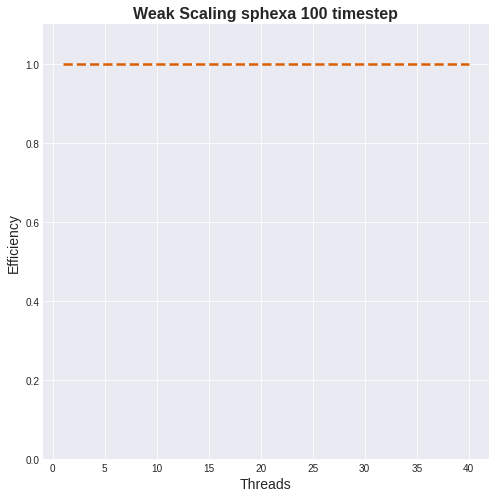

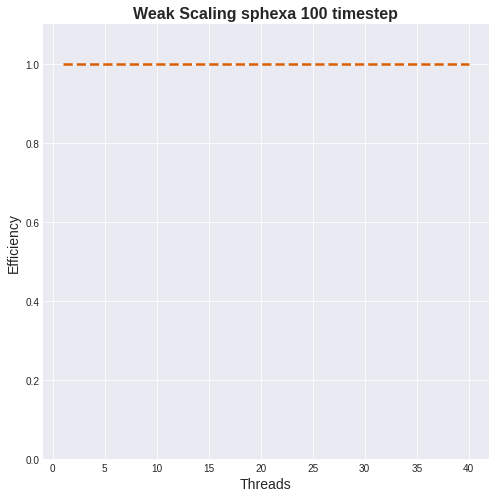

In [218]:
# Weak Scaling:
# Threads: 1 ,2 , 4, 8,16,32,40
# Sizes:   10,13,16,20,25,32,34
def weakscalingplot(mode,df,versions,time=100,output=None):
    threads = [1,2,4,8,16,32,40]
    if mode == 'a':
        sizes =   [10,13,16,20,25,32,34]
    elif mode == 'b':
        sizes = [20,25,32,40,50,63,68]

    for version in versions:
        basetime = df[(df['Version'] == version) & (df['n_particles'] == sizes[0]) & (df['Timestep'] == time) & (df['Threads'] == 1)]['AvgTime'].mean()
        times = []
        for i in range(len(sizes)):
            data = df[df['Version'] == version]
            data = data[data['n_particles'] == sizes[i]]
            data = data[data['Timestep'] == time]
            data = data[data['Threads'] == threads[i]]

            data = data[data['Output'] == False]

            times.append(data['AvgTime'].mean())
        efficiency = [basetime / time for time in times]
        plt.plot(threads,efficiency,label=version,linewidth=2.5)

        # Base Line dashes
        plt.plot(threads,[1]*len(threads),label='Ideal',linewidth=2.5,linestyle='--')
        plt.ylim(0,1.1)

        plt.title(f'Weak Scaling {version} {time} timestep')
        plt.xlabel('Threads')
        plt.ylabel('Efficiency')
        plt.show()

weakscalingplot('b',allresults, ['sphexa'],time=100)
weakscalingplot('a',allresults, ['sphexa'],time=100)

Speedup for 50 particles: 2.6923076923076925


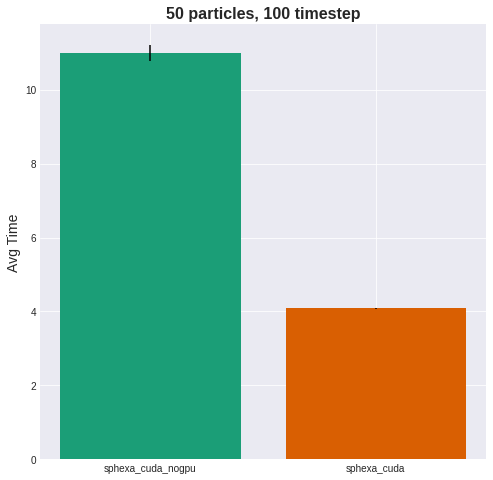

Speedup for 100 particles: 4.305006055712558


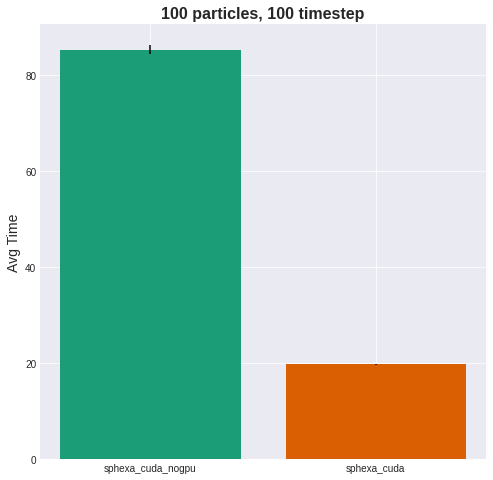

Speedup for 200 particles: 5.008462554419606


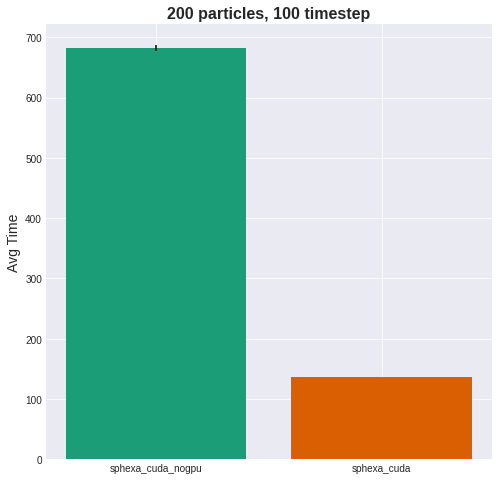

In [219]:
# sphexa vs sphexa-cuda
def vscuda(df,sizes=[50,100,200],time=100):
    threads = 12
    versions = ['sphexa_cuda_nogpu','sphexa_cuda']
    # Bar plot for each size, sphexa_cuda and sphexa_cuda_nogpu adjacent
    originaltime = 0.0
    newtime = 0.0
    for size in sizes:
        for version in versions:
            data = df[df['Version'] == version]
            data = data[data['n_particles'] == size]
            data = data[data['Timestep'] == time]
            data = data[data['Threads'] == threads]
            data = data[data['Output'] == False]
            if data['AvgTime'].isnull().all():
                print(f"No data for {version} {size} {time}")
                continue
            avgtime = data['AvgTime'].mean()
            stdev = data['Stdev'].mean()
            plt.bar(version,avgtime,yerr=stdev)
            plt.title(f'{size} particles, {time} timestep')
            plt.ylabel('Avg Time')
            if version == 'sphexa_cuda_nogpu':
                originaltime = avgtime
            elif version == 'sphexa_cuda':
                newtime = avgtime
        print(f"Speedup for {size} particles: {originaltime/newtime}")
        plt.show()

vscuda(allresults[allresults['Output'] == False],sizes=[50,100,200],time=100)